<a href="https://colab.research.google.com/github/juunnn/DTSAI2019/blob/master/D18_JunaediFahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

---



In [0]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

bc = load_breast_cancer()
data = bc.data
labels = np.reshape(bc.target, (569,1))
features = bc.feature_names
features_labels = np.append(features,'label')
final_data = np.concatenate([data,labels],axis=1)
df = pd.DataFrame(final_data)
df.columns = features_labels
df['label'].replace(0, 'Benign',inplace=True)
df['label'].replace(1, 'Malignant',inplace=True)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [0]:
from sklearn.preprocessing import StandardScaler

x = df.loc[:, features].values # normalizing: mean=0; std=1
x = StandardScaler().fit_transform(x)

In [0]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pC_df = pca.fit_transform(x)
principal_df = pd.DataFrame(data = pC_df, columns = ['PC1', 'PC2'])
principal_df.tail()

,PC1,PC2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [0]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


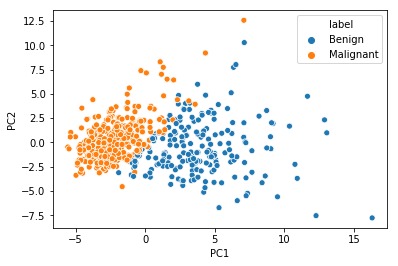

In [0]:
import seaborn as sns

sns.scatterplot(x=principal_df.PC1, y = principal_df.PC2,hue=df.label)

<Figure size 432x288 with 0 Axes>

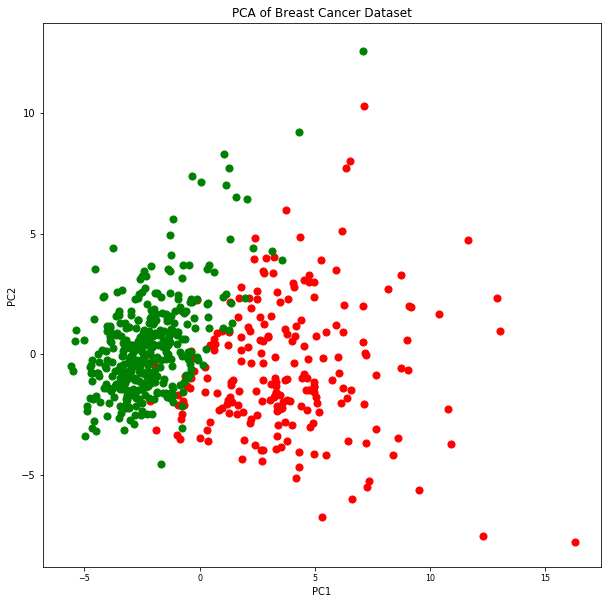

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('PC1',fontsize=10)
plt.ylabel('PC2',fontsize=10)
plt.title("PCA of Breast Cancer Dataset",fontsize=12)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
  indicesToKeep = df['label'] == target
  plt.scatter(principal_df.loc[indicesToKeep, 'PC1'] , principal_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

## Exercise 1

---



In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


models = {
    "knn": KNeighborsClassifier(n_neighbors=3),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="liblinear", multi_class="auto"),
    "svm": SVC(kernel="linear"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    
}

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [0]:
#train data sebelum pca
acc_bc= {}

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, train_size= 80)

before = {}
acc_bc['before'] = {}

for name in models:
  models[name].fit(x_train,y_train)
  before[name] = classification_report(y_test, models[name].predict(x_test), output_dict=True, target_names=bc.target_names)
  acc_bc['before'][name] = before[name]['accuracy']
  

In [0]:
#split data sesuda pca

x_train, x_test, y_train, y_test = train_test_split(principal_df, bc.target, train_size= 80)

after_pca = {}

for name in models:
  models[name].fit(x_train,y_train)
  after_pca[name] = classification_report(y_test, models[name].predict(x_test),output_dict=True, target_names=bc.target_names)
  acc_bc['after_pca'] = after_pca[name]['accuracy']
  

In [0]:
from pprint import pprint as pp

In [0]:
acc_bc

{'after_pca': 0.9386503067484663,
 'before': {'decision_tree': 0.9141104294478528,
  'knn': 0.9284253578732107,
  'logit': 0.9243353783231084,
  'naive_bayes': 0.9386503067484663,
  'random_forest': 0.9447852760736196,
  'svm': 0.8977505112474438}}

In [0]:
df_acc = pd.DataFrame.from_dict(acc_bc)
df_acc.head()

,before,after_pca
decision_tree,0.914110,0.93865
knn,0.928425,0.93865
logit,0.924335,0.93865
naive_bayes,0.938650,0.93865
random_forest,0.944785,0.93865


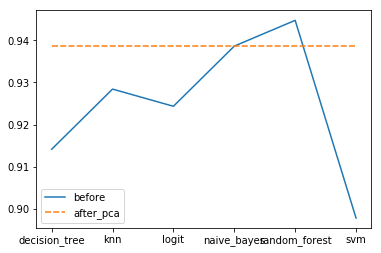

In [0]:
sns.lineplot(data=df_acc)

In [0]:
for name in models:
  print("="*50,"\n", name)
  print("before")
  print(before[name])
  print("after")
  print(after_pca[name])

 knn
before
{'malignant': {'precision': 0.9559748427672956, 'recall': 0.8444444444444444, 'f1-score': 0.8967551622418879, 'support': 180}, 'benign': {'precision': 0.9151515151515152, 'recall': 0.9773462783171522, 'f1-score': 0.9452269170579031, 'support': 309}, 'accuracy': 0.9284253578732107, 'macro avg': {'precision': 0.9355631789594054, 'recall': 0.9108953613807983, 'f1-score': 0.9209910396498955, 'support': 489}, 'weighted avg': {'precision': 0.9301785069119252, 'recall': 0.9284253578732107, 'f1-score': 0.9273845533219465, 'support': 489}}
after
{'malignant': {'precision': 0.8956043956043956, 'recall': 0.9005524861878453, 'f1-score': 0.8980716253443527, 'support': 181}, 'benign': {'precision': 0.9413680781758957, 'recall': 0.9383116883116883, 'f1-score': 0.9398373983739837, 'support': 308}, 'accuracy': 0.9243353783231084, 'macro avg': {'precision': 0.9184862368901456, 'recall': 0.9194320872497668, 'f1-score': 0.9189545118591682, 'support': 489}, 'weighted avg': {'precision': 0.92442


# Linear Discriminant Analysis
---



In [0]:
# standarized all features, have been done before
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
np_lda = lda.fit(x,bc.target).transform(x)
df_lda = pd.DataFrame(np_lda)

print('Explained variation per principal component:{}'.format(lda.explained_variance_ratio_))

Explained variation per principal component:[1.]


In [0]:
df_lda.head()

,0
0,-3.323927
1,-2.319108
2,-3.747425
3,-4.048549
4,-2.281158


## Excercise 2

---



In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_lda, bc.target, train_size= 80)

after_lda = {}
acc_bc['after_lda'] = {}

for name in models:
  models[name].fit(x_train,y_train)
  after_lda[name] = classification_report(y_test, models[name].predict(x_test), output_dict=True, target_names=bc.target_names)
  acc_bc['after_lda'][name] = after_lda[name]['accuracy']

In [0]:
for name in models:
  print(name)
  pp(after_lda[name])
  print("="*50)

knn
{'accuracy': 0.9631901840490797,
 'benign': {'f1-score': 0.9717868338557993,
            'precision': 0.950920245398773,
            'recall': 0.9935897435897436,
            'support': 312},
 'macro avg': {'f1-score': 0.9594228286926054,
               'precision': 0.9693251533742331,
               'recall': 0.9515971316818774,
               'support': 489},
 'malignant': {'f1-score': 0.9470588235294116,
               'precision': 0.9877300613496932,
               'recall': 0.9096045197740112,
               'support': 177},
 'weighted avg': {'f1-score': 0.9628362043511558,
                  'precision': 0.9642440438104558,
                  'recall': 0.9631901840490797,
                  'support': 489}}
naive_bayes
{'accuracy': 0.967280163599182,
 'benign': {'f1-score': 0.9747634069400631,
            'precision': 0.9596273291925466,
            'recall': 0.9903846153846154,
            'support': 312},
 'macro avg': {'f1-score': 0.9641258895165432,
               'precision

In [0]:
df_acc = pd.DataFrame.from_dict(acc_bc)
df_acc

,before,after_pca,after_lda
decision_tree,0.914110,0.93865,0.969325
knn,0.928425,0.93865,0.963190
logit,0.924335,0.93865,0.969325
naive_bayes,0.938650,0.93865,0.967280
random_forest,0.944785,0.93865,0.969325
svm,0.897751,0.93865,0.965235


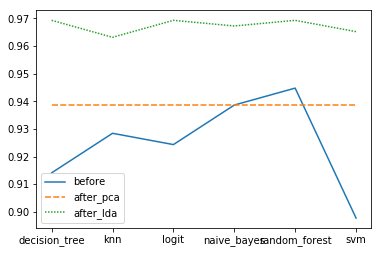

In [0]:
sns.lineplot(data=df_acc)

## Excercise 3

---



In [0]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                sep=";")

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Get Features names and target columns**

In [0]:
wine_features = df_wine.columns.values[:-1]
wine_target = df_wine.columns.values[-1]
wine_label = df_wine.quality.unique()
print(wine_features)
print(wine_target)
print(wine_label)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
quality
[6 5 7 8 4 3 9]


**Standardize Features**

In [0]:
#Standarized wine
std_wine = df_wine.iloc[:,:-1].values
std_wine = StandardScaler().fit_transform(std_wine)

### PCA

In [0]:
pca = PCA(n_components=2)
pC_df = pca.fit_transform(std_wine)
pdf_wine = pd.DataFrame(data = pC_df, columns = ['PC1', 'PC2'])
pdf_wine.tail()

,PC1,PC2
4893,-2.094367,0.390789
4894,1.295014,0.490753
4895,-0.779731,-0.408480
4896,-3.407302,0.915744
4897,-2.823212,-0.130939


### LDA

In [0]:
lda = LinearDiscriminantAnalysis(n_components=2)
np_lda_wine = lda.fit(std_wine,df_wine.quality).transform(std_wine)
df_lda_wine = pd.DataFrame(data = np_lda_wine, columns=['LD1','LD2'])

df_lda_wine.head()

,LD1,LD2
0,-0.870520,1.514632
1,-1.677604,-0.490273
2,-0.242396,-0.727960
3,-0.260282,0.921401
4,-0.260282,0.921401


**Make dict of accuracy**


used for comparison

In [0]:
acc_wine = {}

### Training model before Dimention Reduction



In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_wine, df_wine.quality, train_size= 80, random_state=5)

before = {}
acc_wine['before'] = {}

for name in models:
  models[name].fit(x_train,y_train)
  before[name] = classification_report(y_test, models[name].predict(x_test), output_dict=True)
  acc_wine['before'][name] = before[name]['accuracy']

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

### Training model After PCA

In [0]:
x_train, x_test, y_train, y_test = train_test_split(pdf_wine, df_wine.quality, train_size= 80)

after_pca = {}
acc_wine['after_pca'] = {}

for name in models:
  models[name].fit(x_train,y_train)
  after_pca[name] = classification_report(y_test, models[name].predict(x_test), output_dict=True)
  acc_wine['after_pca'][name] = after_pca[name]['accuracy']

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

### Training model After LDA


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_lda_wine, df_wine.quality, train_size= 80)

after_lda = {}
acc_wine['after_lda'] = {}


for name in models:
  models[name].fit(x_train,y_train)
  after_lda[name] = classification_report(y_test, models[name].predict(x_test), output_dict=True)
  acc_wine['after_lda'][name] = after_lda[name]['accuracy']

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

### Accuracy Comparison

In [0]:
df_acc_wine = pd.DataFrame.from_dict(acc_wine)
df_acc_wine

,before,after_pca,after_lda
decision_tree,0.998962,0.344126,0.426110
knn,0.351598,0.343088,0.424865
logit,0.575965,0.415733,0.466584
naive_bayes,0.998962,0.427978,0.482358
random_forest,0.834786,0.378580,0.459319
svm,0.943337,0.425488,0.465961


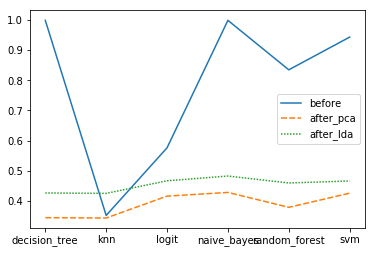

In [0]:
sns.lineplot(data=df_acc_wine)